# Exploratory Data Analysis

Roles to Explore:

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_CRO = df[(df['job_country'] == 'Croatia') & (df['job_title_short'] == 'Data Analyst')]

Job locations

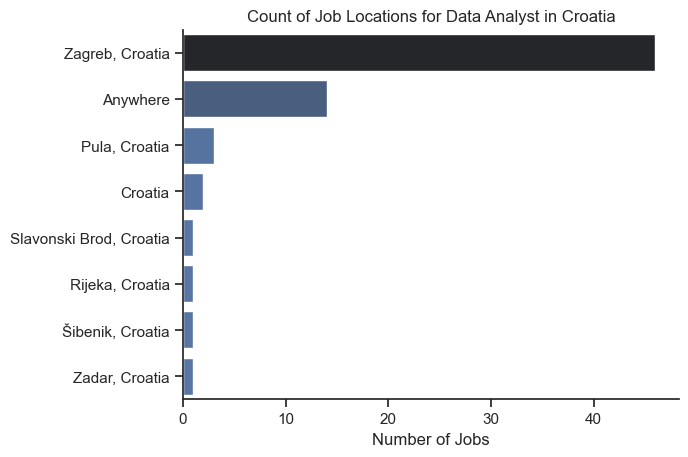

In [10]:
df_plot = df_DA_CRO['job_location'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Count of Job Locations for Data Analyst in Croatia')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

Job Opportunities

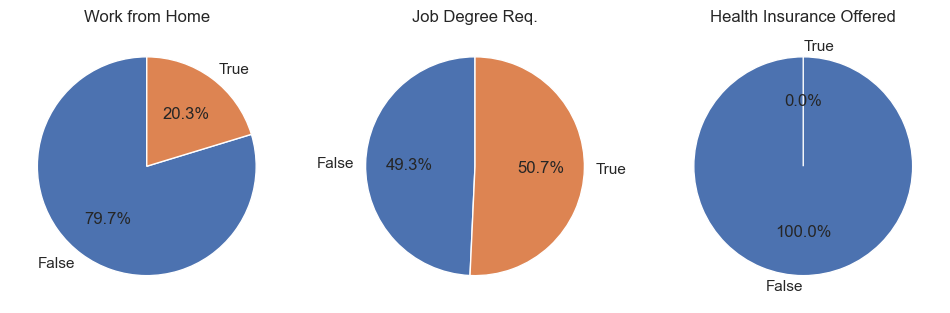

In [ ]:
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, len(dict_column), figsize=(12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    value_counts = df_DA_CRO[column].value_counts().reindex([False, True], fill_value=0)
    labels = value_counts.index.tolist()  
    
    ax[i].pie(value_counts, startangle=90, autopct='%1.1f%%', labels=labels)
    ax[i].set_title(title)

plt.show()

Companies to Explore:

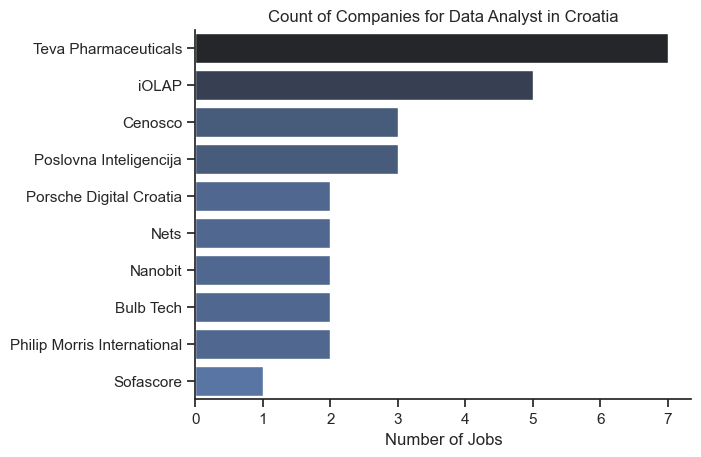

In [22]:
df_plot = df_DA_CRO['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Count of Companies for Data Analyst in Croatia')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()